<Axes: title={'center': 'Shannon entropy: 1.931\nLeibovici entropy: 3.279\nAltieri entropy: 3.507'}, xlabel='x', ylabel='y'>

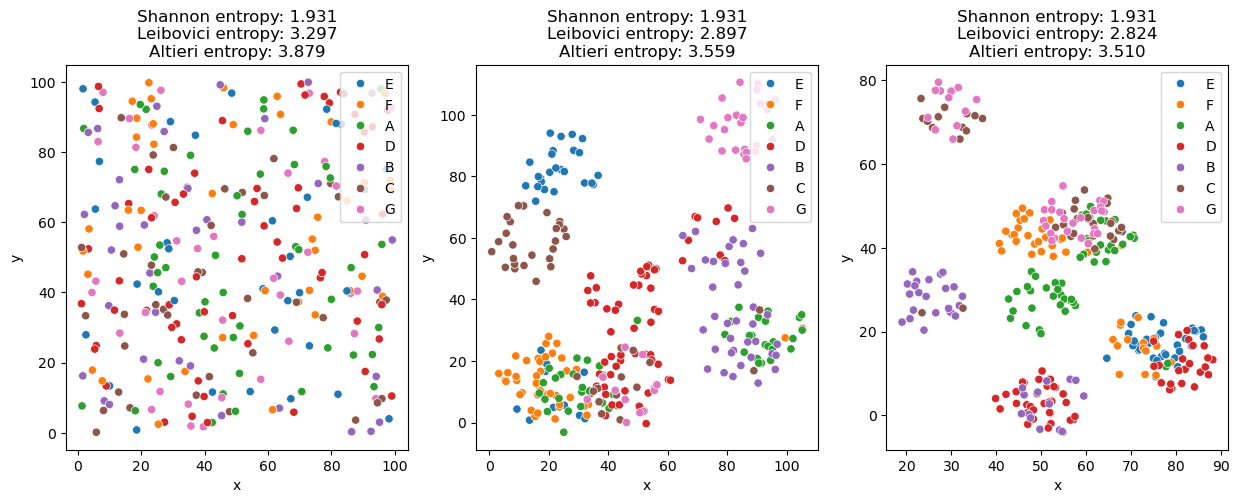

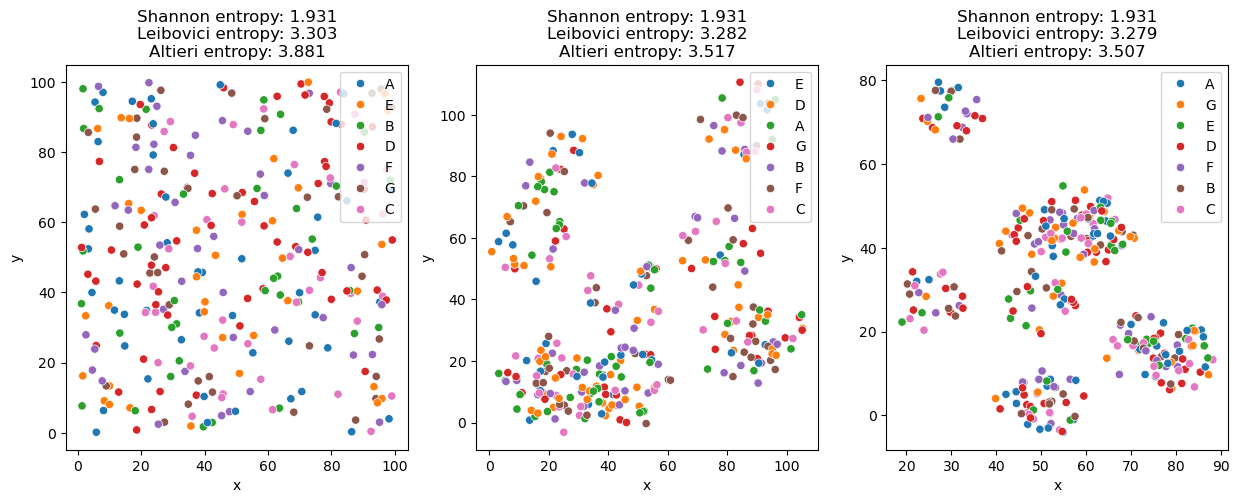

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spatialentropy import leibovici_entropy, altieri_entropy

from utils import plot_points, random_data, cluster_data

from scipy.stats import entropy
from collections import Counter

window = [(0,0),(100,0),(100,100),(0,100)]

# generate random types
types = np.random.choice(["A", "B", "C", "D", "E", "F", "G"], 300)

# complete random data
pp = random_data(window, 300)

# cluster data
cpp1, cpp1_types = cluster_data(window, 300, 12, 14, types)

# more cluster data
cpp2, cpp2_types = cluster_data(window, 300, 12, 8, types)


c = np.asarray(list(Counter(types).values()))
c = c / c.sum()
shan_ent = entropy(c)


# lb_ent1 = leibovici_entropy(pp, types)
# lb_ent2 = leibovici_entropy(cpp1, cpp1_types)
# lb_ent3 = leibovici_entropy(cpp2, cpp2_types)

# ae1 = altieri_entropy(pp, types)
# ae2 = altieri_entropy(cpp1, cpp1_types)
# ae3 = altieri_entropy(cpp2, cpp2_types)


lb_ent1 = leibovici_entropy(pp, types, d=10)
lb_ent2 = leibovici_entropy(cpp1, cpp1_types, d=10)
lb_ent3 = leibovici_entropy(cpp2, cpp2_types, d=10)

ae1 = altieri_entropy(pp, types, cut=10)
ae2 = altieri_entropy(cpp1, cpp1_types, cut=10)
ae3 = altieri_entropy(cpp2, cpp2_types, cut=10)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
plot_points(pp, types, ax=ax1, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent1.entropy:.3f}\nAltieri entropy: {ae1.entropy:.3f}")
plot_points(cpp1, cpp1_types, ax=ax2, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent2.entropy:.3f}\nAltieri entropy: {ae2.entropy:.3f}")
plot_points(cpp2, cpp2_types, ax=ax3, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent3.entropy:.3f}\nAltieri entropy: {ae3.entropy:.3f}")

# randomize the types
np.random.shuffle(types)
np.random.shuffle(cpp1_types)
np.random.shuffle(cpp2_types)

lb_ent1 = leibovici_entropy(pp, types, d=10)
lb_ent2 = leibovici_entropy(cpp1, cpp1_types, d=10)
lb_ent3 = leibovici_entropy(cpp2, cpp2_types, d=10)

ae1 = altieri_entropy(pp, types, cut=10)
ae2 = altieri_entropy(cpp1, cpp1_types, cut=10)
ae3 = altieri_entropy(cpp2, cpp2_types, cut=10)

# lb_ent1 = leibovici_entropy(pp, types)
# lb_ent2 = leibovici_entropy(cpp1, cpp1_types)
# lb_ent3 = leibovici_entropy(cpp2, cpp2_types)

# ae1 = altieri_entropy(pp, types)
# ae2 = altieri_entropy(cpp1, cpp1_types)
# ae3 = altieri_entropy(cpp2, cpp2_types)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
plot_points(pp, types, ax=ax1, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent1.entropy:.3f}\nAltieri entropy: {ae1.entropy:.3f}")
plot_points(cpp1, cpp1_types, ax=ax2, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent2.entropy:.3f}\nAltieri entropy: {ae2.entropy:.3f}")
plot_points(cpp2, cpp2_types, ax=ax3, 
            title=f"Shannon entropy: {shan_ent:.3f}\nLeibovici entropy: {lb_ent3.entropy:.3f}\nAltieri entropy: {ae3.entropy:.3f}")


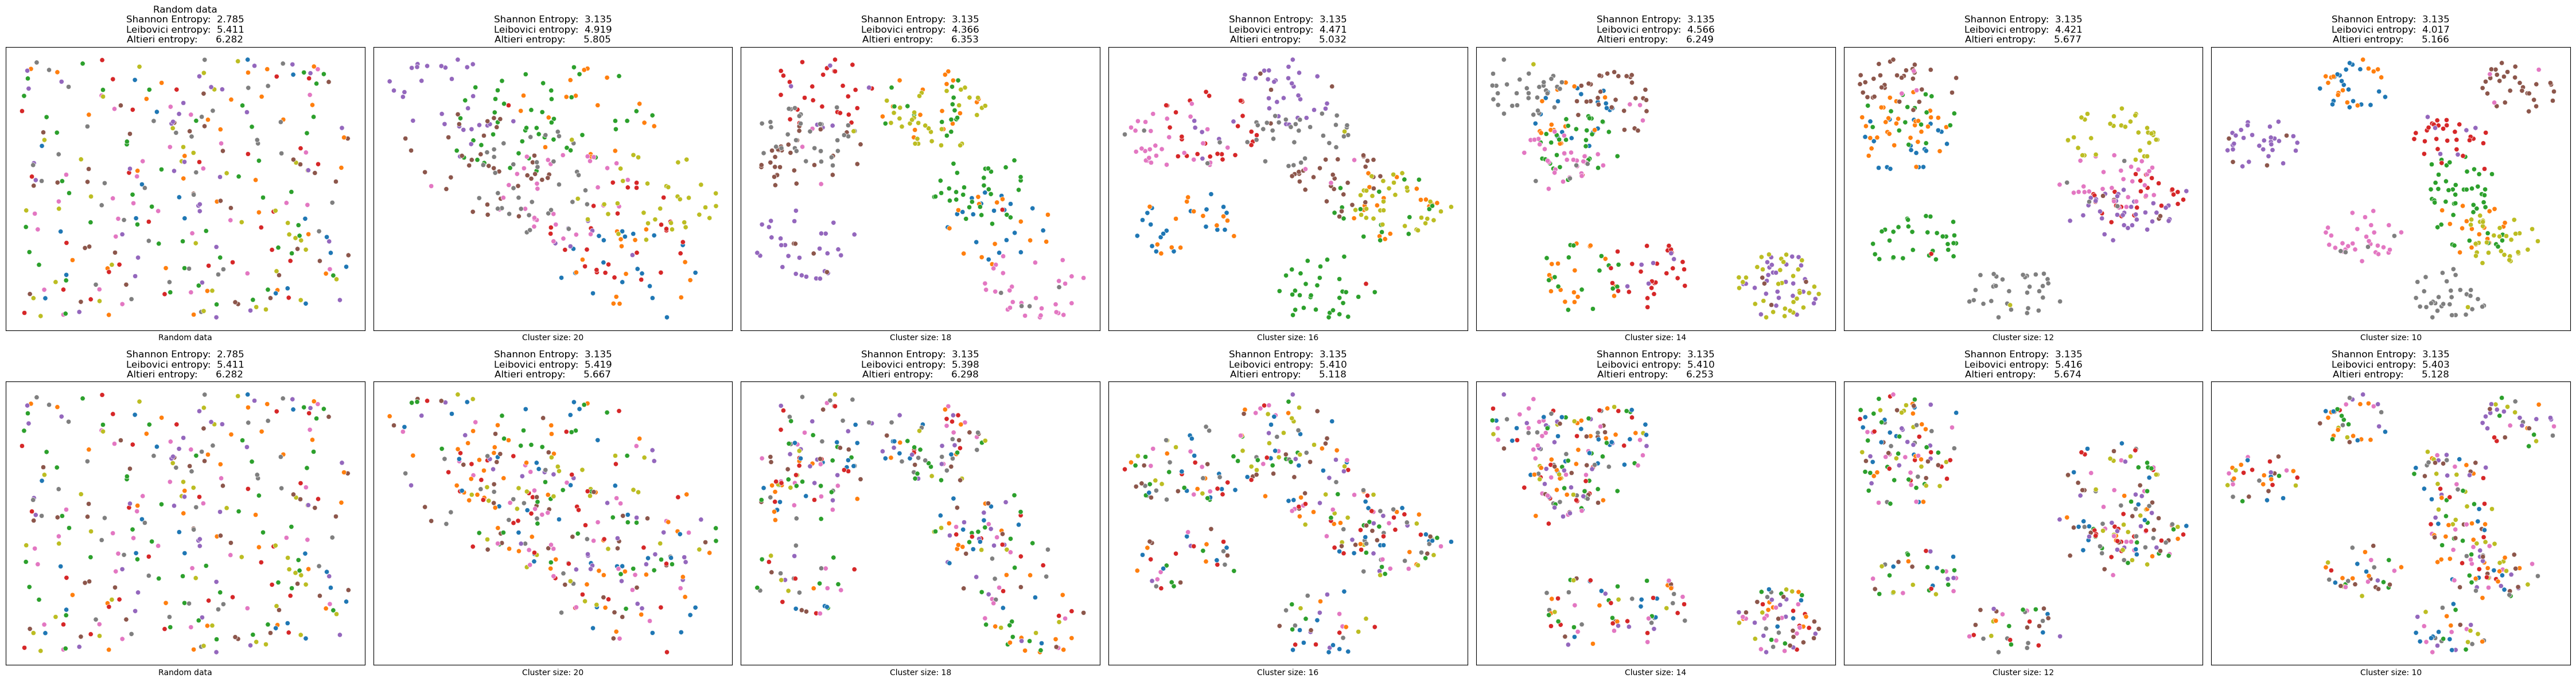

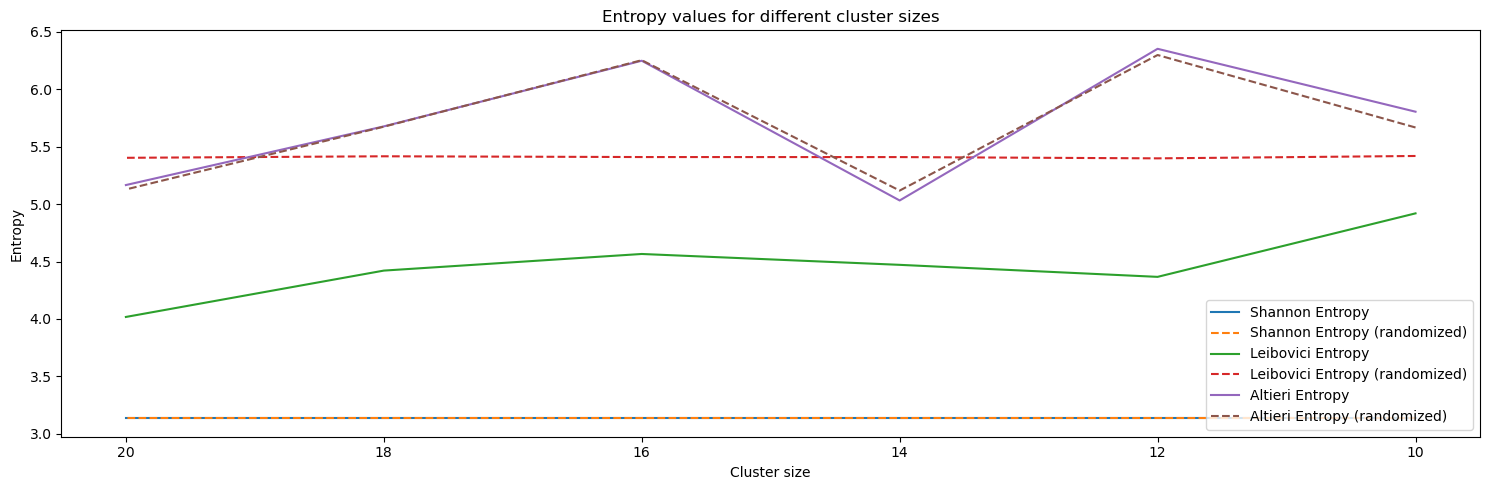

In [4]:
window = [(0,0),(100,0),(100,100),(0,100)]
cluster_amount = 9
types_available = [chr(i) for i in range(65, 65+cluster_amount)]

# generate random types
types = np.random.choice(types_available, 300)
# complete random data
pp = random_data(window, 300)

clustersets = []
entsets = []

clustersets_r = []
entsets_r = []


for i in range(20, 8, -2):
    cpp, cpp_types = cluster_data(window, 300, cluster_amount, i, types)
    
    c = np.asarray(list(Counter(cpp_types).values()))
    c = c / c.sum()
    sha = entropy(c, base=2)
    
    cpp_types_r = cpp_types.copy()
    np.random.shuffle(cpp_types_r)
    
    c = np.asarray(list(Counter(cpp_types_r).values()))
    c = c / c.sum()
    sha_r = entropy(c, base=2)
    
    lei = leibovici_entropy(cpp, cpp_types, base=2, d=10).entropy
    alt = altieri_entropy(cpp, cpp_types, base=2, cut=10).entropy
    
    lei_r = leibovici_entropy(cpp, cpp_types_r, base=2, d=10).entropy
    alt_r = altieri_entropy(cpp, cpp_types_r, base=2, cut=10).entropy
    
    clustersets.append((cpp, cpp_types))
    clustersets_r.append((cpp, cpp_types_r))
    entsets.append((sha, lei, alt))
    entsets_r.append((sha, lei_r, alt_r))

fig, ax = plt.subplots(2, len(clustersets)+1, figsize=(cluster_amount*5,12))

# initial random state
c = np.asarray(list(Counter(cpp1_types).values()))
c = c / c.sum()
sha = entropy(c, base=2)
lei = leibovici_entropy(pp, types, d=10, base=2).entropy
alt = altieri_entropy(pp, types, cut=10, base=2).entropy

plot_points(pp, types, ax=ax[0][0], 
                title=f"Random data\nShannon Entropy: {sha:>6.3f}\nLeibovici entropy: {lei:>6.3f}\nAltieri entropy: {alt:>10.3f}")
ax[0][0].legend().remove()
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_ylabel(None)
ax[0][0].set_xlabel("Random data")

plot_points(pp, types, ax=ax[1][0], 
                title=f"Shannon Entropy: {sha:>6.3f}\nLeibovici entropy: {lei:>6.3f}\nAltieri entropy: {alt:>10.3f}")
ax[1][0].legend().remove()
ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set_ylabel(None)
ax[1][0].set_xlabel("Random data")

for i, (cpp, cpp_types) in enumerate(clustersets):
    plot_points(cpp, cpp_types, ax=ax[0][i+1], 
                title=f"Shannon Entropy: {entsets[i][0]:>6.3f}\nLeibovici entropy: {entsets[i][1]:>6.3f}\nAltieri entropy: {entsets[i][2]:>10.3f}")
    ax[0][i+1].legend().remove()
    ax[0][i+1].set_xticks([])
    ax[0][i+1].set_yticks([])
    ax[0][i+1].set_ylabel(None)
    ax[0][i+1].set_xlabel(f"Cluster size: {20-i*2}")

    
    
for i, (cpp, cpp_types) in enumerate(clustersets_r):
    plot_points(cpp, cpp_types, ax=ax[1][i+1], 
                title=f"Shannon Entropy: {entsets_r[i][0]:>6.3f}\nLeibovici entropy: {entsets_r[i][1]:>6.3f}\nAltieri entropy: {entsets_r[i][2]:>10.3f}")
    ax[1][i+1].legend().remove()
    ax[1][i+1].set_xticks([])
    ax[1][i+1].set_yticks([])
    ax[1][i+1].set_ylabel(None)
    ax[1][i+1].set_xlabel(f"Cluster size: {20-i*2}")
plt.tight_layout()
plt.savefig("plots/entropy_scatters.png", dpi=100)    
plt.show()


# plot entropy values as lines for different cluster sizes
fig, ax = plt.subplots(1, 1, figsize=(15,5))
sha = [x[0] for x in entsets]
lei = [x[1] for x in entsets]
alt = [x[2] for x in entsets]
sha_r = [x[0] for x in entsets_r]
lei_r = [x[1] for x in entsets_r]
alt_r = [x[2] for x in entsets_r]

ax.plot(range(20, 8, -2), sha, label="Shannon Entropy")
ax.plot(range(20, 8, -2), sha_r, label="Shannon Entropy (randomized)", linestyle="dashed")
ax.plot(range(20, 8, -2), lei, label="Leibovici Entropy")
ax.plot(range(20, 8, -2), lei_r, label="Leibovici Entropy (randomized)", linestyle="dashed")
ax.plot(range(20, 8, -2), alt, label="Altieri Entropy")
ax.plot(range(20, 8, -2), alt_r, label="Altieri Entropy (randomized)", linestyle="dashed")

ax.set_title("Entropy values for different cluster sizes")
ax.set_xlabel("Cluster size")
ax.set_ylabel("Entropy")
ax.set_xticks(range(20, 8, -2))
ax.set_xticklabels(ax.get_xticks()[::-1])

ax.legend( loc='lower right')
plt.tight_layout()
plt.savefig("plots/entropy_lines.png", dpi=100)
plt.show()


